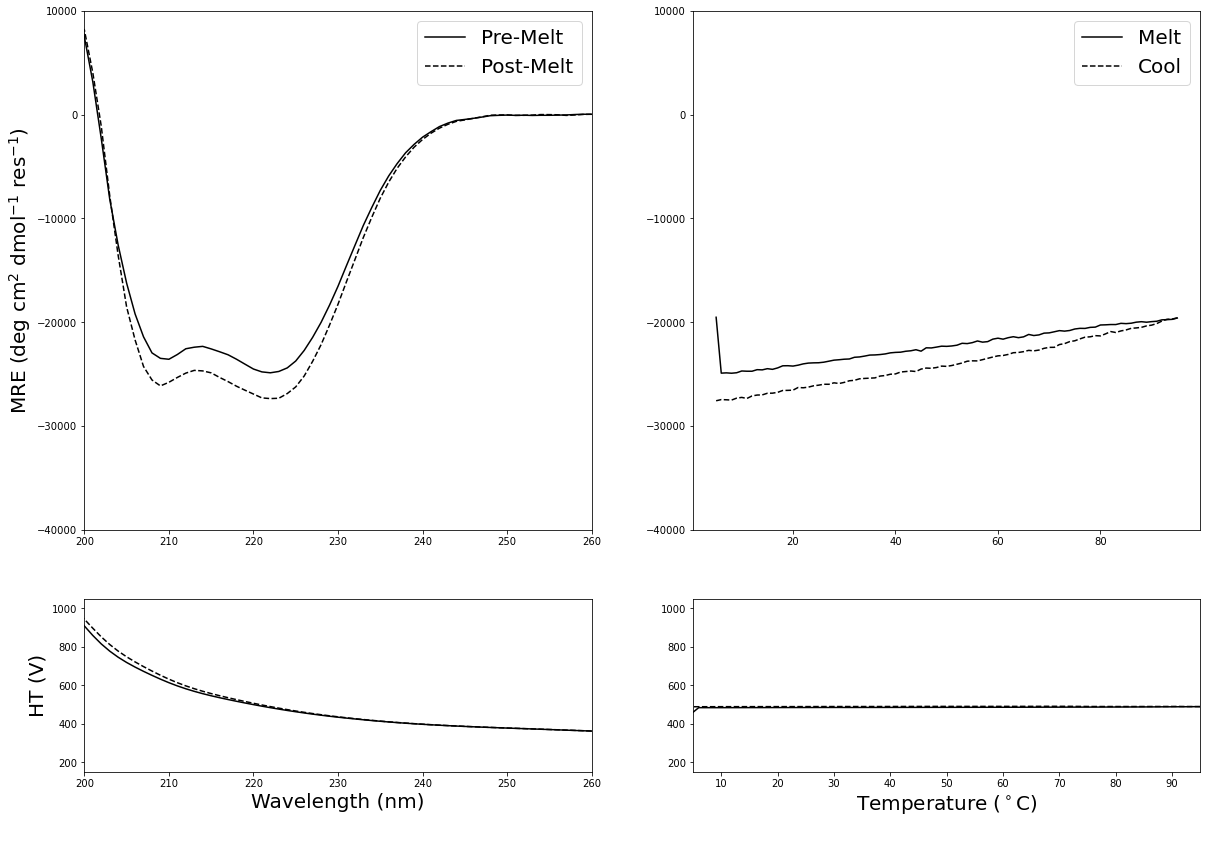

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec

#input experimental parameters - the values may change for each experiment and should be input each time the script is executed
cell_length = 1 #in mm
peptide_conc = 12 #in uM
peptide_bonds = 380 # no of residues +1 i.e. no of amide bonds + N-terminal acetyl
melt_wavelength = 222 #nm

output_file = 'CD_data.png' #name of the file created by the script after plotting (user input)

#value mdeg is divided_by to give MRE
divide_by = cell_length*peptide_conc*peptide_bonds*10**-6

#import raw data files from URL
blank = 'example_data/example_blank.txt'
premelt_scan = 'example_data/example_premelt.txt'
postmelt_scan = 'example_data/example_postmelt.txt'
melt = 'example_data/example_melt.txt'
cool = 'example_data/example_cool.txt'
#blank here is scanning wavelength 

#convert raw data into arrays for processing
blank_array = np.genfromtxt(blank, skip_header=19, names=["wavelength","mdeg","HT"], delimiter='')
premelt_scan_array = np.genfromtxt(premelt_scan, skip_header=19, names=["wavelength","mdeg","HT"], delimiter='')
postmelt_scan_array = np.genfromtxt(postmelt_scan, skip_header=19, names=["wavelength","mdeg","HT"], delimiter='')
melt_array = np.genfromtxt(melt, skip_header=19, names=["temp","mdeg","HT"], delimiter='')
cool_array = np.genfromtxt(cool, skip_header=19, names=["temp","mdeg","HT"], delimiter='')


### pre & postmelt data processing ###

#subtract blank array from scans pre/postmelt scans to normalise
premelt_blanked = np.subtract(premelt_scan_array['mdeg'], blank_array['mdeg'])
postmelt_blanked = np.subtract(postmelt_scan_array['mdeg'], blank_array['mdeg'])

#convert mdeg to MRE 
premelt_MRE = premelt_blanked[:]/divide_by
postmelt_MRE = postmelt_blanked[:]/divide_by

### melt and cool data processing ###

matched_wavelength = blank_array['wavelength'] == melt_wavelength #find the row in the blank array containing the wavelength the CD melt was performed at (222nm) here
matched_blank_mdeg = np.extract(matched_wavelength, blank_array) #extract the blank mdeg value corresponding to the wavelength the melt was performed at

#convert mdeg to MRE 
blank_MRE = matched_blank_mdeg[0][1]/divide_by
melt_MRE = melt_array['mdeg'][:]/divide_by
cool_MRE = cool_array['mdeg'][:]/divide_by

#normalise melt & cool MRE values using the extracted blank value
melt_blanked = np.subtract(melt_MRE[:], blank_MRE)
cool_blanked = np.subtract(cool_MRE[:], blank_MRE)

#plot the processed pre&postmelt data and melt/cool data in one figure 
premelt_postmelt, ax = plt.subplots(2, 2, figsize = (20,14), gridspec_kw={'height_ratios': [3,1]})

ax[0,0].plot(premelt_scan_array['wavelength'], premelt_MRE[:], color = 'black', label = 'Pre-Melt')
ax[0,0].plot(postmelt_scan_array['wavelength'], postmelt_MRE[:], color = 'black', linestyle = '--', label = 'Post-Melt')
ax[0,0].set_ylim(-40000, 10000)
ax[0,0].set_xlim(200, 260)
ax[0,0].set_ylabel('MRE ($\mathrm{deg\ cm^{2}\ dmol^{-1}\ res^{-1}}$)', size=20)
major_yticks = np.arange(-40000, 8000, 5000)
major_xticks = np.arange(200, 261, 20)
minor_xticks = np.arange(200, 261, 10)

ax[1,0].plot(premelt_scan_array['wavelength'], premelt_scan_array['HT'], color = 'black')
ax[1,0].plot(postmelt_scan_array['wavelength'], postmelt_scan_array['HT'], color = 'black', linestyle = '--')
ax[1,0].set_xlim(200,260)
ax[1,0].set_ylim(150,1050)
ax[1,0].set_ylabel('HT (V)', size=20)
ax[1,0].set_xlabel('Wavelength (nm)', size=20)

ax[0,1].plot(melt_array['temp'], melt_blanked[:], color = 'black', label = 'Melt')
ax[0,1].plot(cool_array['temp'], cool_blanked[:], color = 'black', linestyle = '--', label = 'Cool')
ax[0,1].set_ylim(-40000, 10000)

ax[1,1].plot(melt_array['temp'], melt_array['HT'], color = 'black')
ax[1,1].plot(cool_array['temp'], cool_array['HT'], color = 'black', linestyle = '--')
ax[1,1].set_xlim(5,95)
ax[1,1].set_ylim(150,1050)
ax[1,1].set_xlabel('Temperature ($\mathrm{^\circ C}$)\n\n', size =20)

ax[0,0].legend(fontsize = 20)
ax[0,1].legend(fontsize = 20)

##save figure as a png image 
plt.savefig(output_file, bbox_inches='tight', dpi=300, facecolor='w', edgecolor = 'w', orientation = 'portrait', format = 'png', transparent = False, pad_inches=0.1)
